<a href="https://colab.research.google.com/github/cyberone1812/CMUDeepLearning/blob/main/dele_rnn_w7_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Recurrent Node

Compared to a convential neuron, our recurrent neuron will take in an output from the layer itself.  

<center>
   <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/440px-Recurrent_neural_network_unfold.svg.png />
</center>



### A Basic Sequence of Stock Prices



In [ ]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
apple = pd.read_csv('AAPL.csv', index_col = 0)

In [ ]:
#take a peek
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-06,144.289993,144.520004,143.449997,143.660004,139.301605,21149000
2017-04-07,143.729996,144.179993,143.270004,143.339996,138.991318,16672200
2017-04-10,143.600006,143.880005,142.899994,143.169998,138.826462,18933400
2017-04-11,142.940002,143.350006,140.059998,141.630005,137.333206,30379400
2017-04-12,141.600006,142.149994,141.009995,141.800003,137.498032,20350000


In [ ]:
# apple.to_csv('appl.csv')

<Axes: xlabel='Date'>

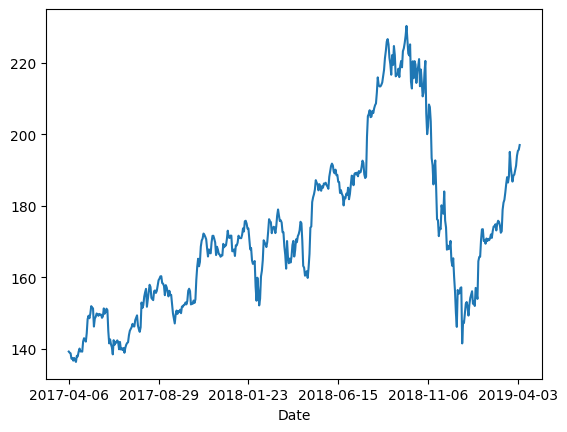

In [ ]:
#plot the adjusted close
apple['Adj Close'].plot()

<Axes: xlabel='Date'>

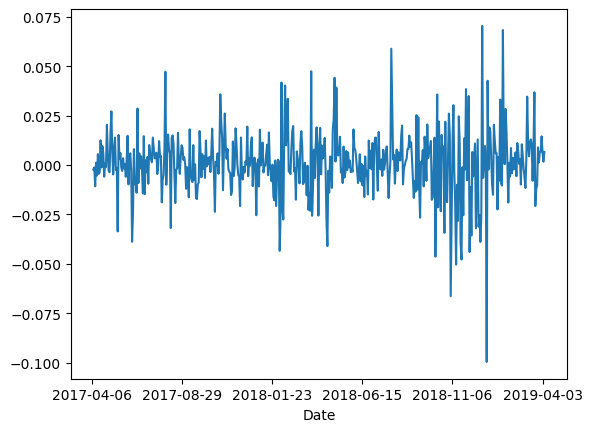

In [ ]:
#look at the percent change
apple['Adj Close'].pct_change().plot()

In [ ]:
#determine X and y
apple_pchange = apple.pct_change().dropna()
X = apple_pchange[['High', 'Low', 'Open', 'Volume']]
y2 = apple_pchange['Adj Close']


In [ ]:
y = np.where(y2 > 0, 1, 0) #making a classification problem

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

In [ ]:
X_train.tail()

,High,Low,Open,Volume
Date,,,,
2018-09-27,0.012022,0.017201,0.012760,0.258352
2018-09-28,-0.002650,0.002147,0.004334,-0.240275
2018-10-01,0.015852,0.010401,0.014058,0.029281
2018-10-02,0.002528,0.001237,-0.003071,0.050312
2018-10-03,0.015087,0.013899,0.012321,0.155986


In [ ]:
X_test.head()

,High,Low,Open,Volume
Date,,,,
2018-10-04,-0.004797,-0.013274,0.003173,0.118207
2018-10-05,-0.016957,-0.027125,-0.012219,0.048015
2018-10-08,-0.015805,-0.001723,-0.025224,-0.116633
2018-10-09,0.010988,0.009310,0.006435,-0.093477
2018-10-10,-0.004048,-0.027896,0.008138,0.561511


### Scaling
------

Per usual we need to scale our data for the network.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#instantiate
sscaler = StandardScaler()

In [ ]:
#fit and transform
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.transform(X_test)

### `TimeSeriesGenerator`
-------
This creates stacks of sequenced data of which we specify the length of the sequences desired.

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
train_sequences = TimeseriesGenerator(X_train_scaled, y_train, length = 3)

In [ ]:
list(train_sequences)[0]

(array([[[-0.31501537, -0.19680477, -0.38236103, -0.67993705],
         [-0.29183909, -0.29749229, -0.1641142 ,  0.1897112 ],
         [-0.42840186, -1.60864377, -0.43479013,  1.36386165]],
 
        [[-0.29183909, -0.29749229, -0.1641142 ,  0.1897112 ],
         [-0.42840186, -1.60864377, -0.43479013,  1.36386165],
         [-0.82775433,  0.41265522, -0.78514129, -0.97655671]],
 
        [[-0.42840186, -1.60864377, -0.43479013,  1.36386165],
         [-0.82775433,  0.41265522, -0.78514129, -0.97655671],
         [ 0.02326972, -0.08014767,  0.06271156, -0.46084552]],
 
        ...,
 
        [[ 0.76027962,  0.68913119,  0.16467724, -0.01081246],
         [-0.08717531,  0.14936909,  0.27788145, -0.60592106],
         [ 0.56481549,  0.35459769,  0.29961715, -0.31455488]],
 
        [[-0.08717531,  0.14936909,  0.27788145, -0.60592106],
         [ 0.56481549,  0.35459769,  0.29961715, -0.31455488],
         [ 0.5757545 , -0.29184981,  0.01983914, -0.24934498]],
 
        [[ 0.56481549,  0

In [ ]:
test_sequences = TimeseriesGenerator(X_test_scaled, y_test, length = 3)

In [ ]:
train_sequences.data.shape

(376, 4)

In [ ]:
train_sequences.targets[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

### Model with `SimpleRNN`
--------

- 1 `SimpleRNN` layer
- 1 hidden `Dense` layer

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense

In [ ]:
#build the network
model1 = Sequential()
model1.add(SimpleRNN(16, activation = 'tanh' ))
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compilation
model1.compile(loss = 'bce',  metrics = ['accuracy'])

In [ ]:
#fit it
history = model1.fit(train_sequences,
                     validation_data=test_sequences,
                     epochs = 10,
                     batch_size = 10)

Epoch 1/10
3/3 [==============================] - 1s 128ms/step - loss: 0.7186 - accuracy: 0.4718 - val_loss: 0.7178 - val_accuracy: 0.4390
Epoch 2/10
3/3 [==============================] - 0s 22ms/step - loss: 0.7055 - accuracy: 0.4772 - val_loss: 0.7134 - val_accuracy: 0.4146
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6985 - accuracy: 0.4853 - val_loss: 0.7121 - val_accuracy: 0.4065
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6937 - accuracy: 0.5228 - val_loss: 0.7125 - val_accuracy: 0.3902
Epoch 5/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6899 - accuracy: 0.5389 - val_loss: 0.7129 - val_accuracy: 0.4390
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6866 - accuracy: 0.5469 - val_loss: 0.7132 - val_accuracy: 0.4553
Epoch 7/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6838 - accuracy: 0.5416 - val_loss: 0.7141 - val_accuracy: 0.4715
Epoch 8/10
3/3 [==========

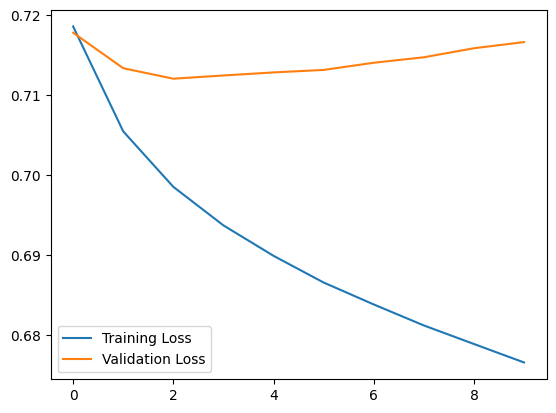

In [ ]:
#loss?
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend();

In [ ]:
y_test.mean()

0.5476190476190477

### The `LSTM` and `GRU` layers

In [ ]:
#network with LSTM
model2 = Sequential()
model2.add(LSTM(16, activation = 'tanh'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compile
model2.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#fit
history = model2.fit(train_sequences, validation_data=test_sequences, epochs = 10)

Epoch 1/10
3/3 [==============================] - 3s 254ms/step - loss: 0.6920 - accuracy: 0.5282 - val_loss: 0.6880 - val_accuracy: 0.5691
Epoch 2/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6905 - accuracy: 0.5335 - val_loss: 0.6868 - val_accuracy: 0.5772
Epoch 3/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6895 - accuracy: 0.5416 - val_loss: 0.6859 - val_accuracy: 0.5691
Epoch 4/10
3/3 [==============================] - 0s 20ms/step - loss: 0.6887 - accuracy: 0.5442 - val_loss: 0.6850 - val_accuracy: 0.5610
Epoch 5/10
3/3 [==============================] - 0s 29ms/step - loss: 0.6881 - accuracy: 0.5442 - val_loss: 0.6845 - val_accuracy: 0.5610
Epoch 6/10
3/3 [==============================] - 0s 30ms/step - loss: 0.6875 - accuracy: 0.5442 - val_loss: 0.6840 - val_accuracy: 0.5691
Epoch 7/10
3/3 [==============================] - 0s 30ms/step - loss: 0.6870 - accuracy: 0.5416 - val_loss: 0.6835 - val_accuracy: 0.5691
Epoch 8/10
3/3 [==========

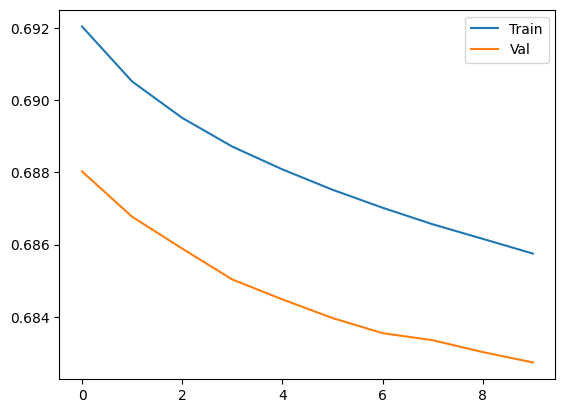

In [ ]:
#examine the loss
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.legend();

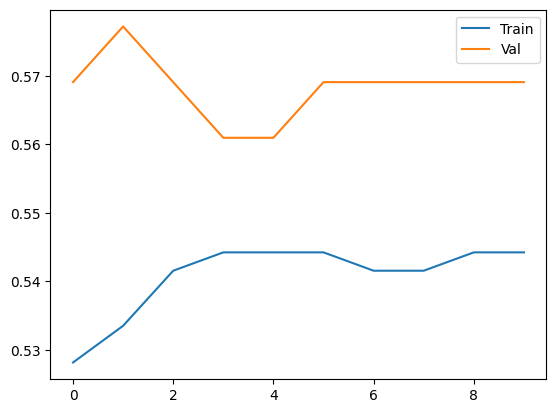

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.legend();

In [ ]:
#GRU layer
model3 = Sequential()
model3.add(GRU(16, activation = 'tanh'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compile
model3.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#train_sequences.targets

In [ ]:
#fit
history = model3.fit(train_sequences, validation_data=test_sequences, epochs = 10)

Epoch 1/10
3/3 [==============================] - 3s 244ms/step - loss: 0.6926 - accuracy: 0.5335 - val_loss: 0.6984 - val_accuracy: 0.5610
Epoch 2/10
3/3 [==============================] - 0s 24ms/step - loss: 0.6904 - accuracy: 0.5416 - val_loss: 0.6984 - val_accuracy: 0.5528
Epoch 3/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6891 - accuracy: 0.5389 - val_loss: 0.6987 - val_accuracy: 0.5528
Epoch 4/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6882 - accuracy: 0.5416 - val_loss: 0.6990 - val_accuracy: 0.5528
Epoch 5/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6874 - accuracy: 0.5389 - val_loss: 0.6994 - val_accuracy: 0.5610
Epoch 6/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6866 - accuracy: 0.5389 - val_loss: 0.6997 - val_accuracy: 0.5528
Epoch 7/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6859 - accuracy: 0.5362 - val_loss: 0.7003 - val_accuracy: 0.5528
Epoch 8/10
3/3 [==========

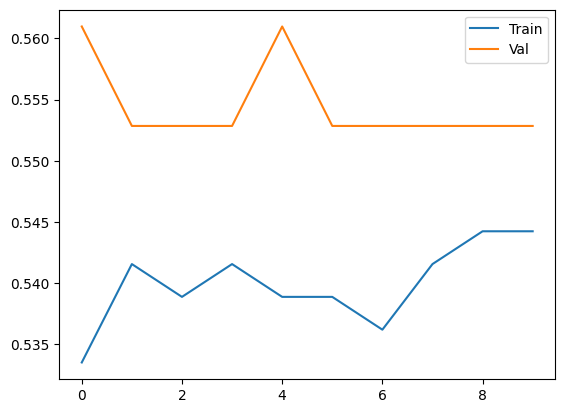

In [ ]:
#examine the loss
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.legend();

In [ ]:
#stacking layers
model4 = Sequential()
model4.add(GRU(32, return_sequences = True))
# model4.add(GRU(16, return_sequences = True))
# model4.add(GRU(16, return_sequences = True))
model4.add(GRU(16))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(loss = 'bce', metrics = ['accuracy'])
history = model4.fit(train_sequences, validation_data = test_sequences, epochs = 50, verbose = 0)

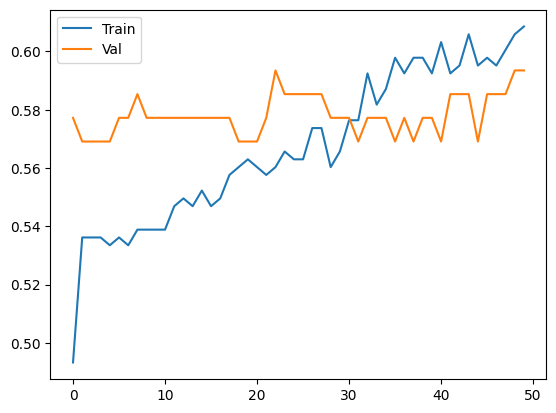

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.legend();

### Sequential Models for Text
-------

Now, we use the Keras `Tokenizer` to preprocess our spam data and feed it through different architectures of sequential network models.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
spam = pd.read_csv('sms_spam.csv')

In [ ]:
spam.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


### `Tokenizer`
------
Here, we set the limit to the number of words at 500, then fit the texts, and finally transform our text to sequences of integer values with the `.texts_to_sequences`.  To assure the same length we use the `pad_sequences` function.  

In [ ]:
#create a tokenizer and specify the vocabulary
tokenizer = Tokenizer(500)

In [ ]:
#fit it on text
tokenizer.fit_on_texts(spam['text'])

In [ ]:
#generate sequences
sequences = tokenizer.texts_to_sequences(spam['text'])

In [ ]:
sequences[:3]

[[122, 3, 22, 313, 4, 53, 110, 37, 8],
 [92, 134, 86, 11, 170],
 [60, 179, 155, 8, 62, 24, 17, 2, 387]]

In [ ]:
from tensorflow.keras.utils import pad_sequences

In [ ]:
#pad sequences to 100
X = pad_sequences(sequences, maxlen = 100)

In [ ]:
#take a peek
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       122,   3,  22, 313,   4,  53, 110,  37,   8], dtype=int32)

In [ ]:
X.shape

(5559, 100)

### Model
-------

In [ ]:
from keras.layers import Embedding

In [ ]:
#sequential model
text_model1 = Sequential()
#embedding layer
text_model1.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
#simple RNN
text_model1.add(SimpleRNN(16))
#dense layer
text_model1.add(Dense(20, activation = 'relu'))
#output
text_model1.add(Dense(1, activation = 'sigmoid'))
#compilation
text_model1.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#make y binary
y = np.where(spam['type'] == 'ham', 0, 1)

In [ ]:
#baseline?
1 - np.mean(y)

0.8656233135456017

In [ ]:
#fit it
history = text_model1.fit(X, y, validation_split = .2, epochs = 10, batch_size = 24)

Epoch 1/10
186/186 [==============================] - 6s 22ms/step - loss: 0.2242 - accuracy: 0.9249 - val_loss: 0.0756 - val_accuracy: 0.9775
Epoch 2/10
186/186 [==============================] - 5s 26ms/step - loss: 0.0582 - accuracy: 0.9829 - val_loss: 0.0621 - val_accuracy: 0.9784
Epoch 3/10
186/186 [==============================] - 4s 20ms/step - loss: 0.0484 - accuracy: 0.9867 - val_loss: 0.0610 - val_accuracy: 0.9829
Epoch 4/10
186/186 [==============================] - 4s 20ms/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 0.0580 - val_accuracy: 0.9802
Epoch 5/10
186/186 [==============================] - 5s 26ms/step - loss: 0.0355 - accuracy: 0.9908 - val_loss: 0.0657 - val_accuracy: 0.9811
Epoch 6/10
186/186 [==============================] - 4s 20ms/step - loss: 0.0292 - accuracy: 0.9928 - val_loss: 0.0596 - val_accuracy: 0.9820
Epoch 7/10
186/186 [==============================] - 4s 20ms/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.0621 - val_accuracy: 0.9811

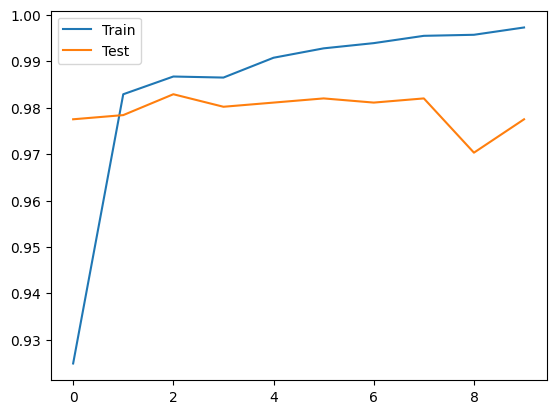

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.legend();

### Improving the Model
-----

- `LSTM` layers
- `GRU` layers
- `recurrent_dropout`
- `dropout`
- `Bidirectional` layers

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(GRU(16))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y, validation_split = 0.2, epochs = 10)

Epoch 1/10
139/139 [==============================] - 8s 45ms/step - loss: 0.3003 - acc: 0.9060 - val_loss: 0.0813 - val_acc: 0.9784
Epoch 2/10
139/139 [==============================] - 5s 35ms/step - loss: 0.0611 - acc: 0.9831 - val_loss: 0.0527 - val_acc: 0.9847
Epoch 3/10
139/139 [==============================] - 6s 44ms/step - loss: 0.0420 - acc: 0.9901 - val_loss: 0.0538 - val_acc: 0.9838
Epoch 4/10
139/139 [==============================] - 5s 34ms/step - loss: 0.0346 - acc: 0.9910 - val_loss: 0.0534 - val_acc: 0.9820
Epoch 5/10
139/139 [==============================] - 5s 37ms/step - loss: 0.0288 - acc: 0.9930 - val_loss: 0.0553 - val_acc: 0.9829
Epoch 6/10
139/139 [==============================] - 5s 39ms/step - loss: 0.0249 - acc: 0.9930 - val_loss: 0.0568 - val_acc: 0.9856
Epoch 7/10
139/139 [==============================] - 5s 35ms/step - loss: 0.0208 - acc: 0.9948 - val_loss: 0.0592 - val_acc: 0.9838
Epoch 8/10
139/139 [==============================] - 6s 42ms/step - 

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(GRU(16, recurrent_dropout = 0.2))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y)

174/174 [==============================] - 14s 68ms/step - loss: 0.2637 - acc: 0.9146


In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(GRU(16, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y, validation_split=.2, epochs = 10)

Epoch 1/10
139/139 [==============================] - 15s 82ms/step - loss: 0.2879 - acc: 0.9074 - val_loss: 0.0999 - val_acc: 0.9721
Epoch 2/10
139/139 [==============================] - 11s 75ms/step - loss: 0.0662 - acc: 0.9820 - val_loss: 0.0587 - val_acc: 0.9838
Epoch 3/10
139/139 [==============================] - 11s 81ms/step - loss: 0.0447 - acc: 0.9879 - val_loss: 0.0519 - val_acc: 0.9865
Epoch 4/10
139/139 [==============================] - 11s 81ms/step - loss: 0.0371 - acc: 0.9912 - val_loss: 0.0550 - val_acc: 0.9829
Epoch 5/10
139/139 [==============================] - 11s 81ms/step - loss: 0.0308 - acc: 0.9930 - val_loss: 0.0554 - val_acc: 0.9847
Epoch 6/10
139/139 [==============================] - 11s 81ms/step - loss: 0.0267 - acc: 0.9937 - val_loss: 0.0729 - val_acc: 0.9802
Epoch 7/10
139/139 [==============================] - 11s 82ms/step - loss: 0.0267 - acc: 0.9921 - val_loss: 0.0578 - val_acc: 0.9838
Epoch 8/10
139/139 [==============================] - 11s 80ms

In [ ]:
from keras.layers import Bidirectional

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(Bidirectional(GRU(16)))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
model.fit(X, y, validation_split = 0.2, epochs = 10)

Epoch 1/10
139/139 [==============================] - 13s 67ms/step - loss: 0.2915 - acc: 0.8939 - val_loss: 0.0745 - val_acc: 0.9793
Epoch 2/10
139/139 [==============================] - 8s 58ms/step - loss: 0.0560 - acc: 0.9856 - val_loss: 0.0534 - val_acc: 0.9847
Epoch 3/10
139/139 [==============================] - 9s 64ms/step - loss: 0.0388 - acc: 0.9899 - val_loss: 0.0533 - val_acc: 0.9838
Epoch 4/10
139/139 [==============================] - 9s 65ms/step - loss: 0.0307 - acc: 0.9928 - val_loss: 0.0534 - val_acc: 0.9856
Epoch 5/10
139/139 [==============================] - 8s 57ms/step - loss: 0.0299 - acc: 0.9921 - val_loss: 0.0563 - val_acc: 0.9847
Epoch 6/10
139/139 [==============================] - 9s 64ms/step - loss: 0.0254 - acc: 0.9937 - val_loss: 0.0609 - val_acc: 0.9820
Epoch 7/10
139/139 [==============================] - 9s 64ms/step - loss: 0.0216 - acc: 0.9946 - val_loss: 0.0625 - val_acc: 0.9811
Epoch 8/10
139/139 [==============================] - 9s 64ms/step -

### Convolutional Networks in 1D
--------

In [ ]:
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
model.add(Conv1D(32, 10, activation = 'relu'))
model.add(MaxPooling1D(4))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', metrics = ['acc'])

In [ ]:
Y = y.reshape(-1, 1)

In [ ]:
model.fit(X, Y, epochs = 10)

Epoch 1/10
174/174 [==============================] - 3s 13ms/step - loss: 0.4094 - acc: 0.8616
Epoch 2/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3781 - acc: 0.8739
Epoch 3/10
174/174 [==============================] - 3s 17ms/step - loss: 0.3663 - acc: 0.8788
Epoch 4/10
174/174 [==============================] - 3s 15ms/step - loss: 0.3624 - acc: 0.8804
Epoch 5/10
174/174 [==============================] - 2s 12ms/step - loss: 0.3598 - acc: 0.8811
Epoch 6/10
174/174 [==============================] - 2s 12ms/step - loss: 0.3580 - acc: 0.8818
Epoch 7/10
174/174 [==============================] - 2s 14ms/step - loss: 0.3570 - acc: 0.8822
Epoch 8/10
174/174 [==============================] - 3s 16ms/step - loss: 0.3551 - acc: 0.8825
Epoch 9/10
174/174 [==============================] - 3s 16ms/step - loss: 0.3543 - acc: 0.8828
Epoch 10/10
174/174 [==============================] - 2s 13ms/step - loss: 0.3534 - acc: 0.8831
